# Análisis para Showz

Showz es una empresa de <span style="color: gold;">**venta de entradas de eventos.**</span>

## Objetivo:
Optimizar los gastos del departamento de marketing

### Objetivos específicos:
- Identificar cómo los clientes usan el servicio

- Cuándo empiezan a comprar

- Cuánto dinero aporta cada cliente a la compañía (LTV)

- Cuándo los ingresos cubren el costo de adquisición de los clientes (ROM

## Pasos a seguir
1) Preparación de datos (cargar y limpiar datos)
2) Elaborar informes (gráficos para diferentes dispositivos y fuentes de anuncios y cambio con el tiempo)

    **Informe de visitas**
    * Calcular el DAU, WAU y MAU
    * Sesiones por día
    * Duración de la sesión (ASL)
    * Tasa de retención

    **Informe de ventas**
	* Tiempo entre el registro y la conversión
	* Número de pedidos durante un periodo
	* Tamaño promedio de compra
	* LTV

    **Informe de gastos**
    * ¿Cuánto dinero se gastó?
    * Costo de adquisición de clientes (CAC) para cada fuente
    * Rentabilidad de la inversión (ROMI)

3) Conclusión sobre la inversión en marketing:
* ¿Qué fuentes/plataformas recomendarías?
* ¿en qué métricas te enfocaste? ¿Por qué?
* ¿Qué conclusiones sacaste después de encontrar los valores métricos?

## Diccionario de datos
**Visits** (registros de visitas al sitio web)
* ``uid``: identificador único del usuario
* ``device``: dispositivo del usuario
* ``start ts``: fecha y hora de inicio de la sesión
* ``end ts``: fecha y hora de término de la sesión
* ``source id``: identificador de la fuente de anuncios de la que proviene el usuario

**Orders** (pedidos)
* ``uid``: identificador único del usuario que realiza un pedido
* ``buy ts``: fecha y hora del pedido
* ``revenue``: el ingreso de Showz por el pedido

**Costs** (gastos de marketing)
* ``source_id``: identificador de la fuente de anuncios
* ``dt``: fecha
* ``costs``: gastos en esta fuente de anuncios en este día

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización general de los datos

In [2]:
# importar los datasets
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [3]:
# información de 'visits'
visits.info()
print('\n', visits.sample(5))
print('\n', 'Hay', visits.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
147270  desktop  2018-01-13 19:36:00          4  2018-01-13 19:32:00   
307760  desktop  2017-11-16 21:39:00          3  2017-11-16 21:38:00   
49229   desktop  2018-02-10 12:54:00          3  2018-02-10 12:54:00   
107774  desktop  2017-12-30 12:37:00          4  2017-12-30 12:36:00   
191859  desktop  2018-04-29 12:49:00          5  2018-04-29 12:42:00   

                        Uid  
147270  9664212020852357081  
307760  6508783496708522302  
49229    52193908353759

In [4]:
# información general de 'orders'
orders.info()
print('\n', orders.sample(5))
print('\n', 'Hay', orders.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
14418  2017-10-24 21:50:00     0.49  10422837784176671911
3874   2017-07-18 17:16:00     3.67   6414774455516819392
45492  2018-04-25 16:55:00     0.98  15903290387536145904
2635   2017-07-05 15:43:00     2.08  13087347123680326008
33352  2018-02-07 10:48:00     0.70   5428360267575446305

 Hay 0 valores duplicados


In [5]:
# información general de 'costs'
costs.info()
print('\n', costs.sample(5))
print('\n', 'Hay', costs.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
2513         10  2018-05-03    5.35
14            1  2017-06-15   39.71
2386         10  2017-12-25    6.19
261           1  2018-02-17   50.57
1319          4  2018-01-17  386.59

 Hay 0 valores duplicados


### Comentario
En ninguno de los DataFrames hay valores duplicados ni ausentes, solo hay que realizar algunas modificaciones en los nombres de las columnas y algunos tipos de datos.

* **costs**
  * Convertir “dt” a formato fecha
* **orders**
  * Convertir “buy ts” a formato fecha
  * Convertir nombres de las columnas
* **visits**
  * Convertir “end ts” y “start ts” a formato fecha
  * Convertir nombres de las columnas


# Limpieza de datos

In [6]:
# formato nombre de columnas
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
visits.columns = visits.columns.str.replace(' ', '_').str.lower()


In [7]:
# manejo de fechas
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])


# Informe de visitas

In [8]:
# obtener día, semana y mes de la sesión
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.month_name()
visits['session_year'] = visits['start_ts'].dt.isocalendar().year

In [9]:
# duración por sesión en segundos
visits['duration'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

# se excentan las sesiones con duración de 0 segundos
visit_report = visits[visits['duration'] > 0]

In [10]:
# DAU, WAU, MAU
dau = (
    visit_report.groupby(['session_year', 'session_date'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

wau = (
    visit_report.groupby(['session_year', 'session_week'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

mau = (
    visit_report.groupby(['session_year', 'session_month'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

# factor de adherencia de los usuarios
sticky_factor = (dau / mau) * 100
sticky_factor = sticky_factor.round().astype(int)

print(f'DAU {dau.iloc[0]} usuarios')
print(f'WAU {wau.iloc[0]} usuarios')
print(f'MAU {mau.iloc[0]} usuarios')
print(f'Factor de adherencia de los usuarios {sticky_factor.iloc[0]}%')

DAU 818 usuarios
WAU 5148 usuarios
MAU 20956 usuarios
Factor de adherencia de los usuarios 4%


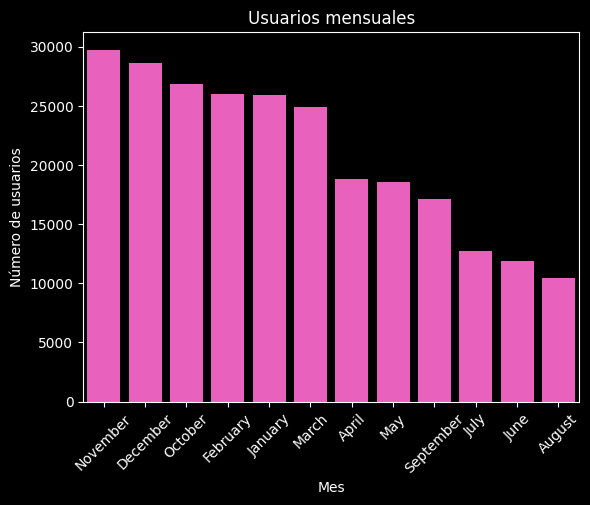

In [11]:
# usuarios mensuales
usuarios_per_month = (
    visit_report.groupby('session_month')
    .agg({'uid':'nunique'})
    .sort_values(by='uid', ascending=False)
)

# gráfico de barras: usuarios mensuales
plt.style.use('dark_background')
sns.barplot(usuarios_per_month,
            x='session_month',
            y='uid',
            color='#FF4AC4'
)
plt.title('Usuarios mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

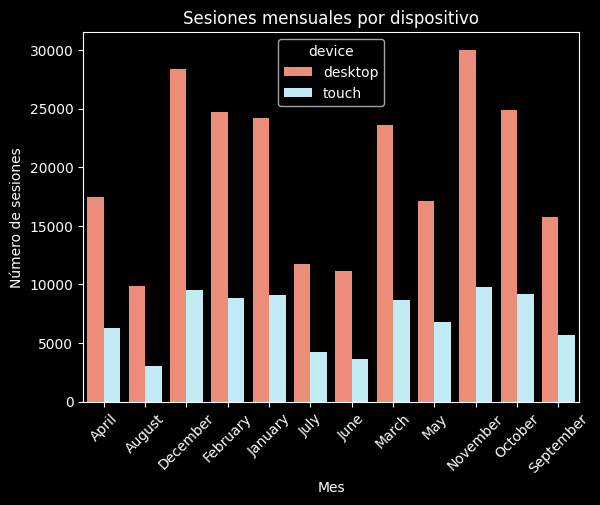

In [12]:
# sesiones mensuales por dispositivo
sessions_per_device = (
    visit_report.groupby(['session_month', 'device'])
    .agg({'uid':'count'})
    .reset_index()
)

# gráfico de barras: sesiones mensuales por dispositivo
sns.barplot(sessions_per_device,
            x='session_month',
            y='uid',
            hue='device',
            palette={
                'desktop':'#FF8066',
                'touch': '#B8F1FF'
            })
plt.title('Sesiones mensuales por dispositivo')
plt.xlabel('Mes')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.show()

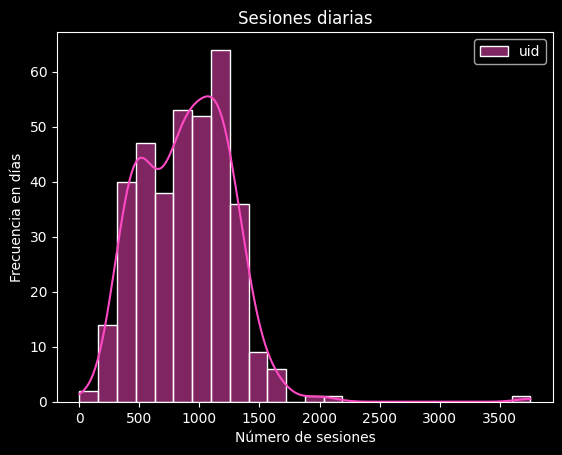

In [13]:
# número de sesiones diarias
sessions_per_day = (
    visit_report.groupby('session_date')
    .agg({'uid':'count'})
)

# histograma: número de sesiones diarias
sns.histplot(sessions_per_day,
             palette={'uid':'#FF4AC4'},
             kde=True)
plt.title('Sesiones diarias')
plt.xlabel('Número de sesiones')
plt.ylabel('Frecuencia en días')
plt.show()

In [14]:
# promedio de sesiones al día
mean_sessions = sessions_per_day.mean().round().astype(int)
# media de sesiones al día
median_sessions = sessions_per_day.median().round().astype(int)

print(f'Media {mean_sessions.iloc[0]} sesiones por día')
print(f'Mediana {median_sessions.iloc[0]} sesiones por día')

Media 889 sesiones por día
Mediana 898 sesiones por día


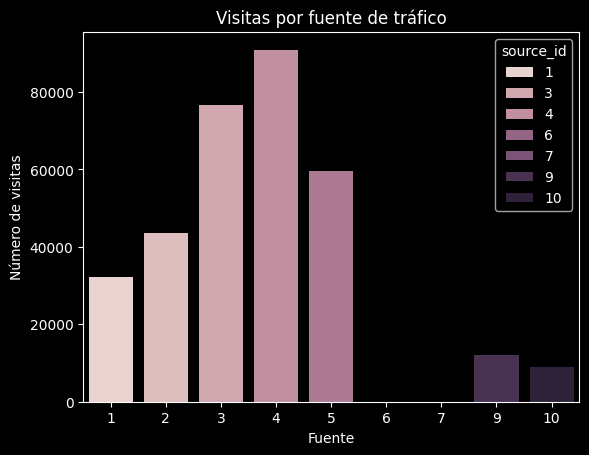

In [15]:
# número de visitas por fuente de tráfico
visit_per_source = (
    visit_report.groupby('source_id')
    .agg({'uid':'count'})
)

# gráfico de barras: número de visitas por fuente de tráfico
sns.barplot(visit_per_source,
            x='source_id',
            y='uid',
            hue='source_id'
)

plt.title('Visitas por fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Número de visitas')
plt.show()

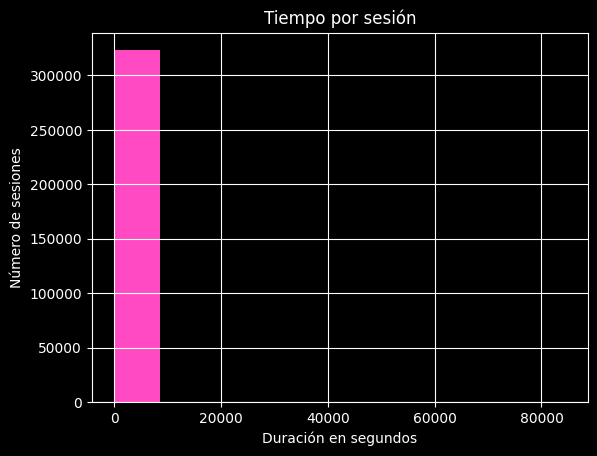

In [16]:
# histograma de duración por sesión
visit_report['duration'].hist(
    color='#FF4AC4'
)
plt.title('Tiempo por sesión')
plt.xlabel('Duración en segundos')
plt.ylabel('Número de sesiones')
plt.show()

In [17]:
# estadísticos descriptivos de 'duration'
duration = visit_report['duration'].describe()

# moda de la duración de las sesiones
asl = visit_report['duration'].mode()

print(duration)
print('\n',f'ASL {asl.iloc[0]} segundos')

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64

 ASL 60 segundos


### Comentario
El reporte de visitas se compone del periodo 01 junio 2017 - 31 mayo 2018. El reporte contenía registros de sesiones con duración de 0 segundos, estos registros fueron omitidos ya que pudieron deberse a algún fallo del portal o conexión por parte del usuario, sin embargo, es de importancia comentarlo para confirmar cómo tratar estos registros.

Durante el periodo, mensualmente tuvimos 20,956 usuarios promedio, con un factor de adherencia del 4% (4/100 usuarios volvían a la plataforma), donde se puede apreciar que el dispositivo más usado por los usuarios es el “Desktop” y en su mayoría las sesiones duraron 60 segundos. Durante el último trimestre de 2017 se registró nuestra mayor cantidad de usuarios.

A lo largo del periodo 2017 - 2018 mantuvimos un rango de alrededor de 900 sesiones diarias, con variaciones menores entre días. Hubo pocas ocasiones en que llegamos a tener más del doble de sesiones, siendo particularmente el 24/11/17 el día con mayor número de sesiones.

La pricipal fuente de tráfico fue la 4 y la 3.


# Informe de ventas

In [18]:
# agregar 'order_date' y 'order_month' al df 'orders'
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# agregar primer mes de compra
orders['first_order'] = orders.groupby('uid')['order_month'].transform('min')

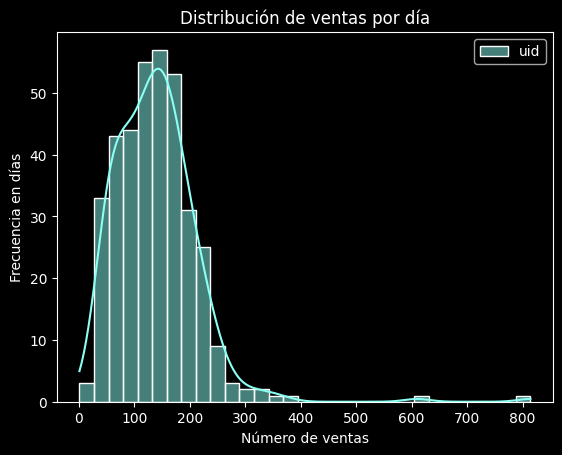

In [19]:
# número de ventas diarias
orders_per_day = (
    orders.groupby('order_date')
    .agg({'uid':'count'})
)

# histograma: número de ventas diarias
sns.histplot(orders_per_day,
             kde=True,
             palette={'uid':'#8AFFF3'})
plt.title('Distribución de ventas por día')
plt.xlabel('Número de ventas')
plt.ylabel('Frecuencia en días')
plt.show()

In [20]:
# promedio de ventas al día
mean_orders = orders_per_day.mean().round().astype(int)
# media de ventas al día
median_orders = orders_per_day.median().round().astype(int)

print(f'Media {mean_orders.iloc[0]} ventas por día')
print(f'Mediana {median_orders.iloc[0]} ventas por día')

Media 139 ventas por día
Mediana 136 ventas por día


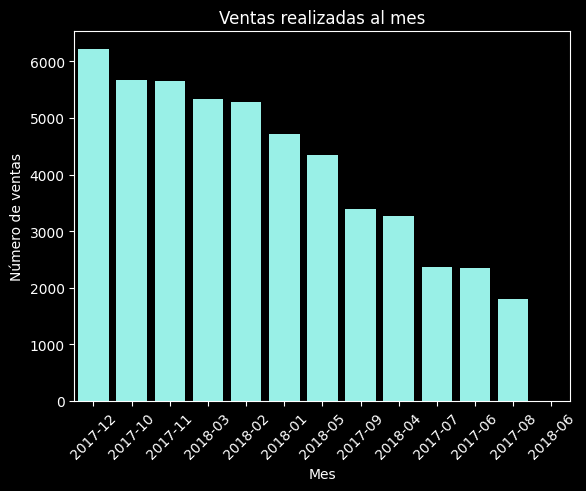

In [21]:
# número de ventas mensuales
orders_per_month = (
    orders.groupby('order_month')
    .agg({'uid':'count'})
    .reset_index()
    .sort_values(by='uid', ascending=False)
)

# gráfico de barras: número de ventas mensuales
sns.barplot(orders_per_month,
            x='order_month',
            y='uid',
            color='#8AFFF3')
plt.title('Ventas realizadas al mes')
plt.xlabel('Mes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()

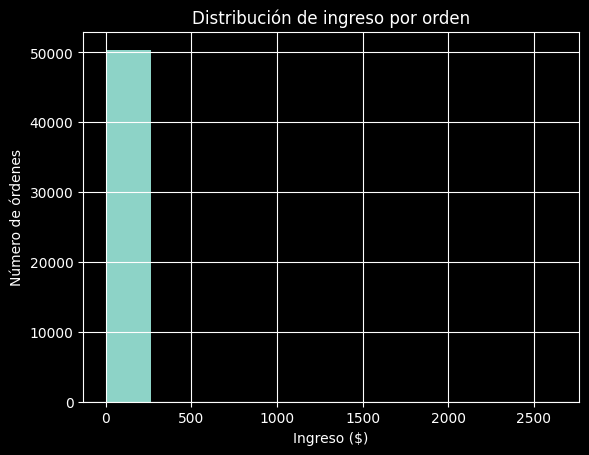

In [22]:
# histograma de ingreso por orden
orders['revenue'].hist()
plt.title('Distribución de ingreso por orden')
plt.xlabel('Ingreso ($)')
plt.ylabel('Número de órdenes')
plt.show()

In [23]:
# análisis descriptivo de 'revenue'
describe_revenue = orders['revenue'].describe()

# obtener moda de 'revenue'
mode_revenue = orders['revenue'].mode()

# obtener mediana de 'revenue'
median = orders['revenue'].median()

# total de gastos en marketing
total_revenue = orders['revenue'].sum()

print(describe_revenue)
print('\n', f'Moda ${mode_revenue.iloc[0]}')
print(f'Mediana ${median}')
print(f'Total de ventas ${total_revenue}')

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

 Moda $1.83
Mediana $2.5
Total de ventas $252057.19999999998


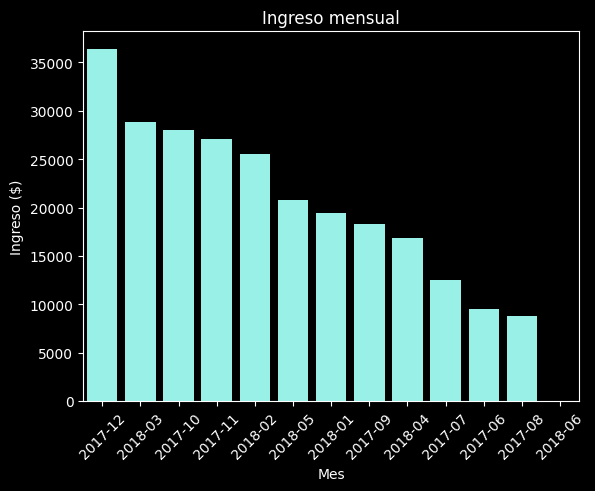

In [24]:
# ingreso mensual
revenue_per_month = (
    orders.groupby('order_month')
    .agg({'revenue':'sum'})
    .sort_values(by='revenue', ascending=False)
)

# gráfico de barras: ingreso mensual
sns.barplot(revenue_per_month,
            x='order_month',
            y='revenue',
            color='#8AFFF3')
plt.title('Ingreso mensual')
plt.xlabel('Mes')
plt.ylabel('Ingreso ($)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# dataframe de primeras visitas de los usuarios
first_visits = (
    visit_report.groupby('uid')
    .agg({
        'start_ts':'min',
        'source_id':'first'
    })
    .reset_index()
)
first_visits['session_date'] = first_visits['start_ts'].dt.date
first_visits['session_month'] = (first_visits['start_ts']).dt.to_period('M')
first_visits.rename(columns={'start_ts':'first_session'}, inplace=True)

# dataframe de primeras compras de los usuarios
first_orders = (
    orders.groupby('uid')
    .agg({'buy_ts':'min'})
    .reset_index()
)
first_orders['buy_ts'] = first_orders['buy_ts'].dt.date

In [26]:
# dataframe 'conversion_report': junta las primeras visitas con las primeras compras
conversion_report = pd.merge(first_visits, first_orders, on='uid')
conversion_report.rename(columns={'buy_ts':'first_purchase'}, inplace=True)

# convertir a formato datetime
conversion_report['first_session'] = pd.to_datetime(conversion_report['first_session'])
conversion_report['first_purchase'] = pd.to_datetime(conversion_report['first_purchase'])

# obtener días transcurridos para la conversión
conversion_report['days_to_convert'] = (
    (conversion_report['first_purchase'] - conversion_report['first_session'])
    / np.timedelta64(1, 'D')
)
conversion_report['days_to_convert'] = conversion_report['days_to_convert'].round().astype(int)

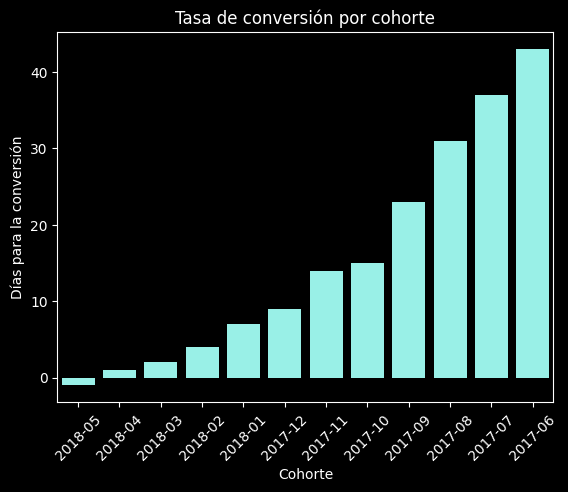

In [27]:
# tasa de conversión por cohorte mensual
conversion_per_cohort = (
    conversion_report.groupby('session_month')
    .agg({
        'days_to_convert':'mean',
        'uid':'nunique'
    })
    .round()
    .astype(int)
    .reset_index()
    .sort_values(by='days_to_convert')
)

# gráfico de barras: tasa de conversión por cohorte mensual
sns.barplot(conversion_per_cohort,
            x='session_month',
            y='days_to_convert',
            color='#8AFFF3')
plt.title('Tasa de conversión por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Días para la conversión')
plt.xticks(rotation=45)
plt.show()

In [28]:
# tasa de conversión por fuente de tráfico
conversion_per_source = (
    conversion_report.groupby('source_id')
    .agg({
        'days_to_convert':'mean',
        'uid':'nunique'
    })
    .round()
    .astype(int)
    .reset_index()
    .sort_values(by='days_to_convert')
)

# tabla: tasa de conversión por fuente de tráfico
conversion_per_source

,source_id,days_to_convert,uid
5,7,0,1
4,5,12,6758
7,10,12,1226
0,1,13,3761
2,3,14,9020
3,4,15,9690
1,2,20,4249
6,9,30,1376


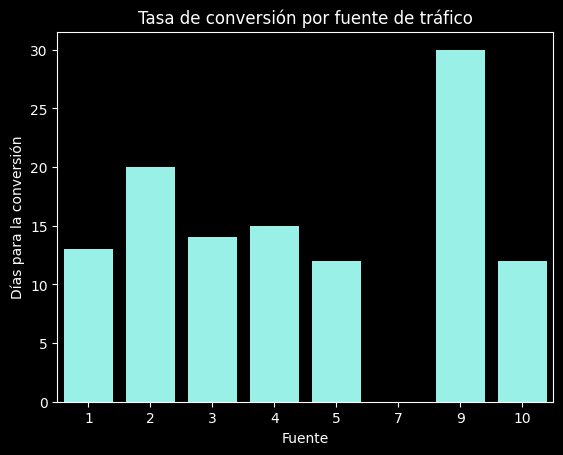

In [29]:
# gráfico de barras: tasa de conversión por fuente de tráfico
sns.barplot(conversion_per_source,
            x='source_id',
            y='days_to_convert',
            color='#8AFFF3')
plt.title('Tasa de conversión por fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Días para la conversión')
plt.show()

In [30]:
# elaborar cohorte
cohorts = (
    orders.groupby(['first_order', 'order_month'])
    .agg({'revenue':'sum'})
    .reset_index()
)
cohorts.rename(columns={'first_order':'cohort'}, inplace=True)

# calcular tamaño de las cohortes
cohort_size = (
    orders.groupby('first_order')
    .agg({'uid':'nunique'})
    .reset_index()
)
cohort_size.rename(columns={'uid':'users_cohort'}, inplace=True)

In [31]:
# df de cohortes
cohorts = cohorts.merge(cohort_size, left_on='cohort', right_on='first_order')

# calcular 'cohort_life'
cohorts['cohort_life'] = (cohorts['order_month'] - cohorts['first_order']).apply(lambda x: x.n)

# calcular el 'ltv'
cohorts['ltv'] = cohorts['revenue'] / cohorts['users_cohort']

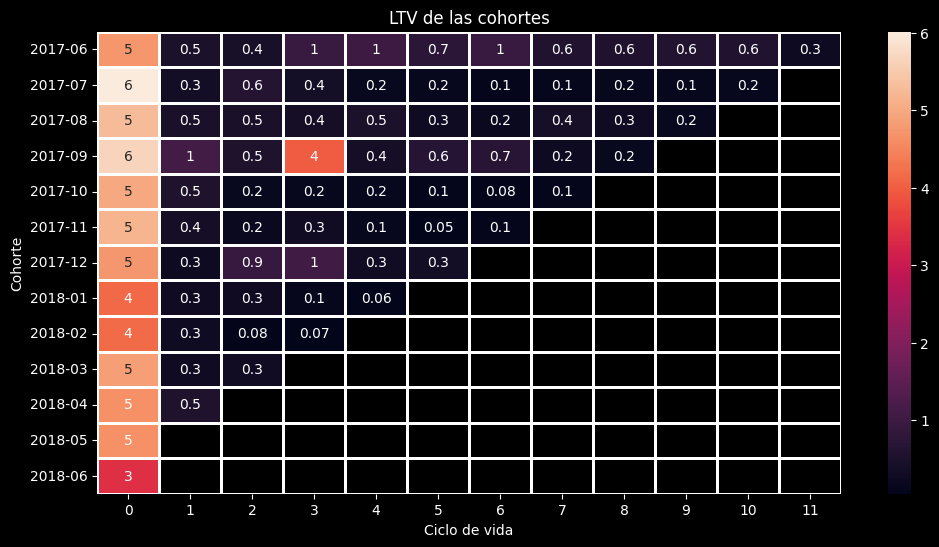

In [32]:
# reporte de 'ltv' para el periodo
report_ltv = cohorts.pivot_table(
    index='cohort',
    columns='cohort_life',
    values='ltv',
    aggfunc='sum'
)

# heatmap: reporte de 'ltv' de las cohortes
plt.figure(figsize=[12, 6])
sns.heatmap(report_ltv,
            annot=True,
            fmt='.1g',
            linewidths=1,
            linecolor='white')
plt.title('LTV de las cohortes')
plt.xlabel('Ciclo de vida')
plt.ylabel('Cohorte')
plt.show()

### Comentario
Durante el periodo, las ventas diarias se estabilizaron alrededor de las 140, con variaciones menores entre días, siendo el último trimestre del 2017 el que presenta mayor número de pedidos. El ingreso promedio por ticket fue de $2, con un total de ventas de $252,057 en el periodo, colocándose diciembre como el mes con mayor ingreso ($36,389).

En cuanto a tasa de conversión, esta fue mayor en las cohortes de marzo, abril y mayo (2018) ya que a partir de la primera visita del usuario transcurrieron menos de 3 días para que realizara su primera compra. En lo que respecta a las fuentes de tráfico, la 5 y 3 tuvieron mejor tasa de conversión.

Al realizar un análisis de cohortes, se encuentra que el ingreso promedio por cliente (LTV) tiene su auge en el periodo en que realiza su primera compra y en los meses posteriores este tiende a bajar drásticamente. Puntualmete, la cohorte de septiembre 2017, en el 4° mes tuvo una mejoría con respecto a las otras, aunque finalmente volvió a tener una caída.